1a)

In [ ]:
import numpy as np
import matplotlib.pylab as plt
import pandas as pd
from collections import Counter

In [2]:
data=pd.read_csv('tweet_counts.csv')

In [3]:
k=data['count'].values
w=data['week'].values

In [4]:
Expoential=lambda λ,α: α*np.exp(-λ*α)
Expoential=np.vectorize(Expoential)

In [5]:
Poisson=lambda k,λ: (λ**k)*np.exp(-λ)/np.math.factorial(k)
Poisson=np.vectorize(Poisson)

In [6]:
α=1/np.mean(k)

In [20]:
def log_posterior(data,param):
    k,w=data
    lamb1,lamb2,W_s=param
    
    P=0
    
    for i in k[w<W_s]:
        P=P+np.log(Poisson(i,lamb1)*Expoential(lamb1,α))

    for j in k[w>=W_s]:
        P=P+np.log(Poisson(j,lamb2)*Expoential(lamb2,α))
        
    return(P)

In [21]:
def MCMC(log_Posterior,data,initial,step_cov,n_iteration):
    param1=np.array(initial)
    sample=np.array(initial)
    for j in range(n_iteration):
        log_Posterior_i=log_Posterior(data,param1)
        #update the location
        param2=np.random.multivariate_normal(param1,step_cov)
        #find new posterior
        log_Posterior_f=log_Posterior(data,param2)
        # generate a random number between 0 and 1
        rand=np.random.rand()
        if log_Posterior_f-log_Posterior_i>np.log(rand):
            sample=np.vstack((sample,param2))
            param1=param2[:]
        else:
            sample=np.vstack((sample,param1))
    return(sample)

In [22]:
D=MCMC(log_posterior,data=[k,w],initial=[20,20,20],step_cov=[[0.25,0,0],[0,0.25,0],[0,0,0.5]],n_iteration=10000)

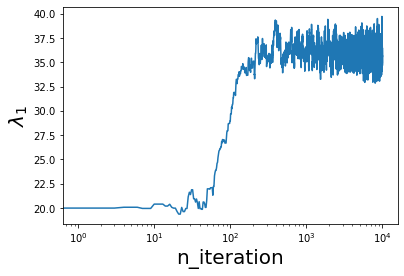

In [23]:
plt.plot(D.T[0])
plt.ylabel("$\lambda_1$",fontsize=20)
plt.xlabel("n_iteration",fontsize=20)
plt.xscale('log')

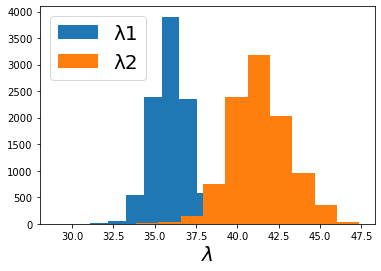

In [24]:
plt.hist(D.T[0][100:],label='λ1')
plt.hist(D.T[1][100:],label='λ2')
plt.xlabel("$λ$",fontsize=20)
plt.legend(fontsize=20)
plt.show()

In [25]:
np.mean(D.T[0][100:])

35.95034063751201

In [26]:
np.mean(D.T[1][100:])

41.37826322894245

In [27]:
np.mean(D.T[2][100:])

33.50323338557973

With larger the number of iteration, the more accurate of the posteriors

1b)
The Posterior consistent with Homework #2

In [29]:
P_favor=0
for i in D.T[0][100:]:
    for j in D.T[1][100:]:
        if (j-i)>5:
            P_favor+=1

In [30]:
Prob=P_favor/(len(D.T[0][100:])*len(D.T[1][100:]))
print(Prob)

0.5742892102780052


# Problem 2

In [31]:
import sklearn
from sklearn.datasets import make_blobs
X,Y=make_blobs(n_samples=500,cluster_std=0.8,centers=3,n_features=3,random_state=0)

(-5.0, 11.0)

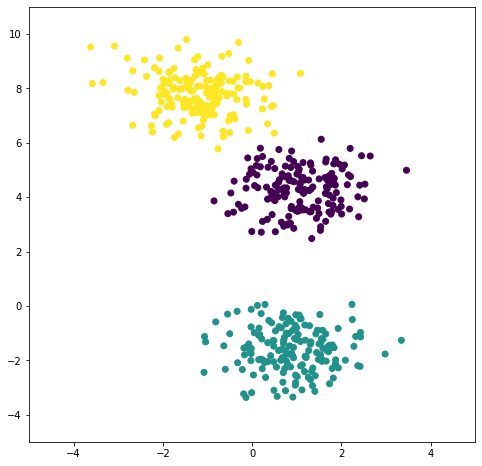

In [32]:
import matplotlib.pylab as plt
plt.figure(figsize=(8,8))
plt.scatter(X[:,0],X[:,1],c=Y)
plt.xlim(-5,5)
plt.ylim(-5,11)

In [33]:
def cluster (data, centers):
    distances = np.sqrt(((data - centers[:, np.newaxis])**2).sum(axis=2))
    return np.argmin(distances, axis=0)

In [34]:
def move_centers(data, clusters, centers):
    return np.array([data[clusters==k].mean(axis=0) for k in range(centers.shape[0])])

In [35]:
def KClusters (data,k):
    #Start with k centers
    new_centers=data[np.random.randint(data.shape[0],size=k)]
    clusters=np.zeros(data.shape[0])
    dist=np.zeros((data.shape[0],k))
    error=1
    while error!=0:
        old_centers=new_centers
        #Cluster each point with the center nearest to it
        clusters=cluster(data,old_centers)
        #Find the centroid of each cluster and replace the set of old cneters with the centroids
        new_centers=move_centers(data,clusters,old_centers)
        error=np.linalg.norm(new_centers-old_centers)
        
    return (data,clusters,new_centers)

In [36]:
P,C,Final_centers=KClusters(X,3)

In [37]:
Final_centers

array([[ 1.06070938,  4.26887294,  1.879373  ],
       [-1.19789994,  7.81260774,  9.26849868],
       [ 0.89280439, -1.60355314,  2.82566473]])

(-5.0, 11.0)

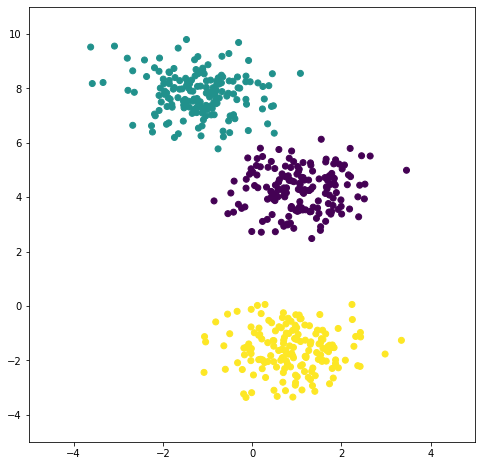

In [38]:
import matplotlib.pylab as plt
plt.figure(figsize=(8,8))
plt.scatter(P[:,0],P[:,1],c=C)
plt.xlim(-5,5)
plt.ylim(-5,11)

We can find the optimal number of clusters by finding the sum of squared error for different value of k clusters. Finding the squared error for each point in each cluster center. Sum all squared errors for all points.

In [39]:
def FindError(data,clusters,centers):
    for k in range (centers.shape[0]):
        Error=np.linalg.norm(data[clusters==k]-centers[k]).sum()
    return Error

In [43]:
Error=[]
for i in range (1,12):
    data,clusters,final_centers=KClusters(X,i)
    e=FindError(data,clusters,final_centers)
    Error=np.append(Error,e)

In [44]:
Error

array([119.79155071,  59.6669007 ,  17.46724662,  17.27364478,
        10.95434729,   9.66452418,  10.65935222,  12.13618194,
        10.54571953,   3.83054458,   5.71311513])

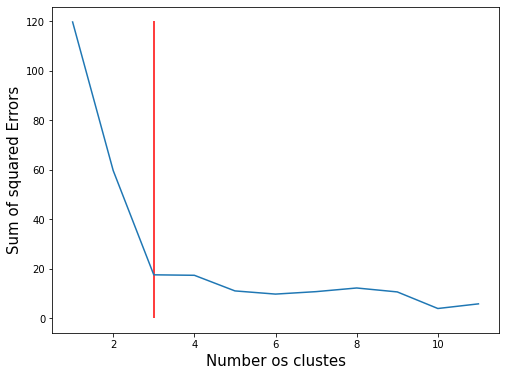

In [45]:
plt.figure(figsize=(8,6))
plt.plot(range(1,12),Error)
plt.vlines(3,0,120,color='red')
plt.xlabel('Number os clustes',fontsize=15)
plt.ylabel('Sum of squared Errors',fontsize=15)
plt.show()

range(1, 11)